<h1>Fake News Detection using NLP</h1>

In [200]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import itertools



<h2>Data Exploration</h2>

In [201]:
# import 'fake_or_real_news.csv'
df = pd.read_csv("/Users/aishwarya/Desktop/Mini_Project/fake_or_real_news.csv");

# inspect shape of df
print(df.shape)

# print first few rows of df
df.head()


(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [202]:
# set index
df = df.set_index("Unnamed: 0")

# print first few rows of df
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


<h2>Extracting the training data</h2>

In [203]:
# set y
y = df.label
y.head()


Unnamed: 0
8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
Name: label, dtype: object

In [204]:

# drop 'label' column 
df.drop("label", axis=1, inplace=True)
df.head()


,title,text
Unnamed: 0,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [205]:
# make training and test sets
X_train, X_test, y_train, y_test= train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [206]:
X_train.head()

Unnamed: 0
8055                                                     
5656    Report Copyright Violation Do you think there ...
669     The election in 232 photos, 43 numbers and 131...
5630    Email Ever wonder what’s on the mind of today’...
9797    Wells Fargo is Rotting from the Top Down Wells...
Name: text, dtype: object

In [207]:
y_train.head()

Unnamed: 0
8055    FAKE
5656    FAKE
669     REAL
5630    FAKE
9797    FAKE
Name: label, dtype: object

<h2>Building Vector Classifiers </h2>

<h3>1. Using Count Vectorizer </h3>

In [208]:
# initialize the count_vectorizer and remove english stop words
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(2,2))

# fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train)

# transform the test set
count_test = count_vectorizer.transform(X_test)


<h3>2. Using Tfidf Vectorizer </h3>

In [209]:
# initialize the tfidf_vectorizer and remove english stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(2,2))

# fit and transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# transform the test set
tfidf_test = tfidf_vectorizer.transform(X_test)


In [210]:
# print first 10 feature names of tfidf_vectorizer
print(tfidf_vectorizer.get_feature_names()[:10])

#print first 10 feature names of count_vectorizer
print(count_vectorizer.get_feature_names()[:10])


['00 00', '00 015', '00 10', '00 14', '00 barrel', '00 books', '00 cruz', '00 debate', '00 debt', '00 doors']
['00 00', '00 015', '00 10', '00 14', '00 barrel', '00 books', '00 cruz', '00 debate', '00 debt', '00 doors']


In [211]:
# inspecting the vectors

# create count vectorizer data frame
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# create tfidf vectorizer data frame
tfidf_df = pd.DataFrame(tfidf_train.A, columns=count_vectorizer.get_feature_names())

# print head of count_df
print(count_df.head())

#print head of tfidf_df
print(tfidf_df.head())

# calculate the difference in columns
difference = set(tfidf_df.columns) - set(count_df.columns)
print(difference)

# check whether the DataFrames are equal
print(count_df.equals(tfidf_df))



   00 00  00 015  00 10  00 14  00 barrel  00 books  00 cruz  00 debate  \
0      0       0      0      0          0         0        0          0   
1      0       0      0      0          0         0        0          0   
2      0       0      0      0          0         0        0          0   
3      0       0      0      0          0         0        0          0   
4      0       0      0      0          0         0        0          0   

   00 debt  00 doors  ...  حلب لم  عربي year  عن الأمر  لم تنجح  ما تحتاج  \
0        0         0  ...       0          0         0        0         0   
1        0         0  ...       0          0         0        0         0   
2        0         0  ...       0          0         0        0         0   
3        0         0  ...       0          0         0        0         0   
4        0         0  ...       0          0         0        0         0   

   محاولات إجلاء  من حلب  هذا ما  والمرضى من  ยงade actions  
0              0       0

<h2> Confusion Matrix </h2>

In [212]:
# Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.ylim([1.5, -.5])
    plt.show()

<h2> Naive Bayes Model </h2>

<h3>1. For Count Vectorizer </h3>

ACCURACY:  0.9029172644667623
Confusion Matrix: 
[[ 821  187]
 [  16 1067]]


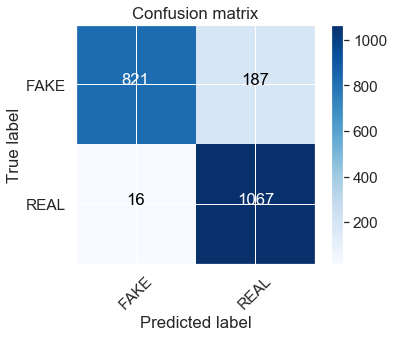

In [213]:
# create Naive Bayes Model with CountVectorizer

# instantiate a Multinomial Naive Bayes classifier 
nb_classifier = MultinomialNB()

# fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# predict test data
pred = nb_classifier.predict(count_test)

# calculate the accuracy score
score = metrics.accuracy_score(y_test, pred)
print('ACCURACY: ', score)

# calculate the confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print('Confusion Matrix: ')
print(cm)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])




<h3>2. For Tfidf Vectorizer </h3>

ACCURACY:  0.9105691056910569
Confusion Matrix: 
[[ 835  173]
 [  14 1069]]


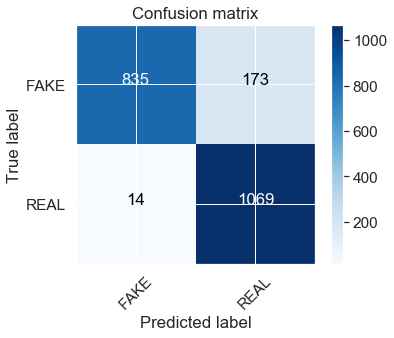

In [214]:
# create Naive Bayes Model with TfidfVectorizer

# instantiate a Multinomial Naive Bayes classifier 
nb_classifier = MultinomialNB()

# fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# predict test data
pred = nb_classifier.predict(tfidf_test)

# calculate the accuracy score
score = metrics.accuracy_score(y_test, pred)
print('ACCURACY: ', score)

# calculate the confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print('Confusion Matrix: ')
print(cm)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

<h4>Improving Naive Bayes model </h4>

In [215]:
# improving NB model by testing with different alpha levels

alphas = np.arange(0, 1, 0.1)

# define train_and_predict()
def train_and_predict(alpha):
    # instantiate the classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # fit to training data
    nb_classifier.fit(tfidf_train, y_train)
    # predict the labels
    pred = nb_classifier.predict(tfidf_test)
    # calculate accuracy score
    score = metrics.accuracy_score(y_test, pred)
    return score


# iterate over alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.8900047824007652

Alpha:  0.1
Score:  0.9167862266857962

Alpha:  0.2


/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.9134385461501674

Alpha:  0.30000000000000004
Score:  0.9134385461501674

Alpha:  0.4
Score:  0.9124820659971306

Alpha:  0.5
Score:  0.9115255858440937

Alpha:  0.6000000000000001
Score:  0.9096126255380201

Alpha:  0.7000000000000001
Score:  0.9105691056910569

Alpha:  0.8
Score:  0.9105691056910569

Alpha:  0.9
Score:  0.9110473457675753



<h2> Random Forest Model </h2>

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ACCURACY:  0.8393113342898135
Confusion Matrix: 
[[939  69]
 [267 816]]


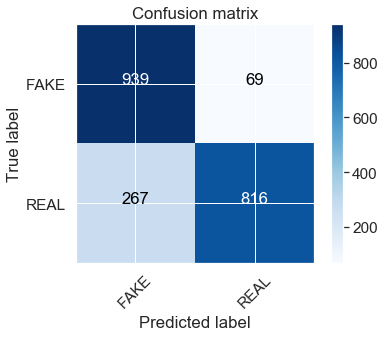

In [216]:
# create a Random Forest model using TfidfVectorizer

rf_classifier = RandomForestClassifier()

rf_classifier.fit(tfidf_train, y_train)

pred = rf_classifier.predict(tfidf_test)

score = metrics.accuracy_score(y_test, pred)
print('ACCURACY: ', score)

# calculate the confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print('Confusion Matrix: ')
print(cm)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


<h2> Gradient Boost Model </h2>

ACCURACY:  0.8354854136776662
Confusion Matrix: 
[[936  72]
 [272 811]]


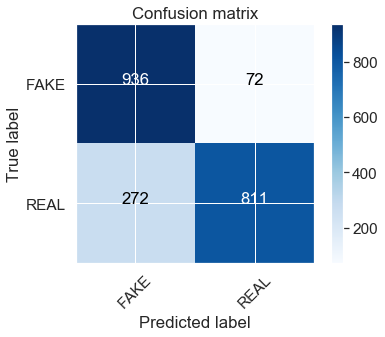

In [217]:
# create Gradiant Boost model using TfidfVectorizer

gb_classifier = GradientBoostingClassifier()

gb_classifier.fit(tfidf_train, y_train)

pred = gb_classifier.predict(tfidf_test)

score = metrics.accuracy_score(y_test, pred)
print('ACCURACY: ', score)

# calculate the confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print('Confusion Matrix: ')
print(cm)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

<h2> Passive Aggressive Model </h2>

ACCURACY:  0.9349593495934959
Confusion Matrix: 
[[ 936   72]
 [  64 1019]]


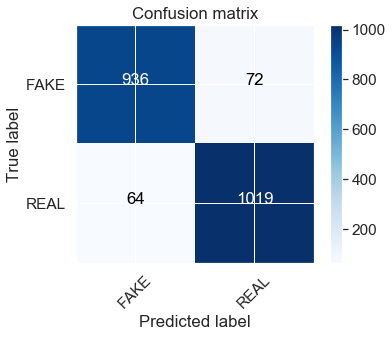

In [218]:
# Create Passive Aggressive Classifier model using TfidfVectorizer 

pa_classifier = PassiveAggressiveClassifier()

pa_classifier.fit(tfidf_train, y_train)

pred = pa_classifier.predict(tfidf_test)

score = metrics.accuracy_score(y_test, pred)
print('ACCURACY: ', score)

# calculate confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print('Confusion Matrix: ')
print(cm)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

<h2>Predicting... </h2>

In [220]:
# article opens text from file which contains the news article text we want to
# check if fake or real 
article = open("/Users/aishwarya/Desktop/Mini_Project/article_test.txt")
X_validation = article.read()

# transforming using same vectorizer to maintain similar token IDs
tfidf_validation = tfidf_vectorizer.transform([X_validation])

# we use gradient boosting (but passive aggressive is most accurate)
pred = gb_classifier.predict(tfidf_validation)

print(pred)


['FAKE']


<p>
To do:
    <ul>
        <li>Add more datapoints and more pre preprocessing if possible</li>        <li>Generate POS tags for syntactical analysis
        <li>Generate feature vector by semantic analysis (Empath - lexicon) </li>
        <li>Combine all </li>
    </ul>

</p>